In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [138]:
from IPython. display import SVG
from graphviz import Source
from IPython. display import display
import numpy as np

In [3]:
from IPython.display import HTML
style = "<style>svg{width:70% !important; height:70% !important;}</style>"
HTML(style)

In [6]:
titanic_data = pd.read_csv("../../data/train.csv") 

In [7]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic_data.isnull().sum() # предобработка, выясняем сколько пропущено.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Ticket','Name','Cabin'],axis=1)

In [14]:
y = titanic_data.Survived

In [15]:
clf = tree.DecisionTreeClassifier()

In [22]:
clf.fit(X,y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [20]:
 X=pd.get_dummies(X)

In [21]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [28]:
X = X.fillna({'Age':X.Age.median()})

In [31]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [32]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [34]:
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

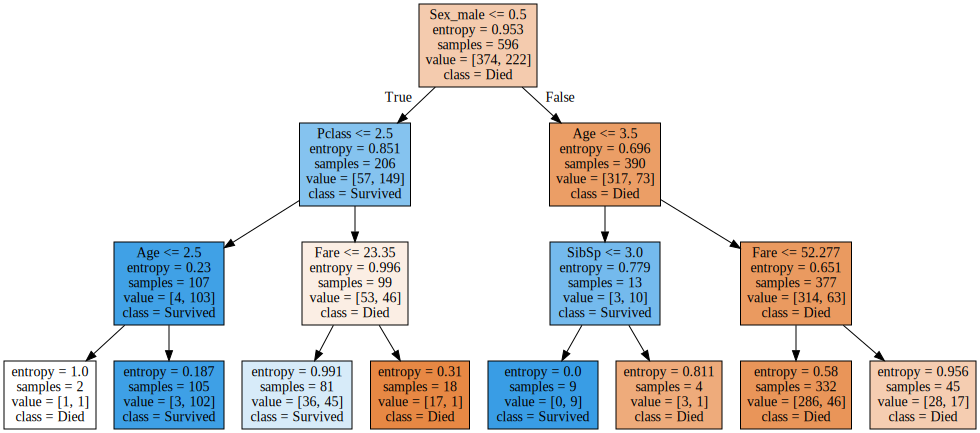

In [55]:
graph = Source(tree.export_graphviz(clf, out_file=None
                                   , feature_names=list(X), class_names=["Died",'Survived']
                                   , filled = True))
display(SVG(graph.pipe(format='svg')))

In [37]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)

In [43]:
X_test.shape

(295, 10)

In [45]:
clf.fit(X_tain,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [47]:
clf.score(X_test,y_test)

0.7661016949152543

In [52]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [53]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [54]:
 clf.score(X_test,y_test)

0.8203389830508474

In [79]:
max_depth_values = range(1,100)

In [80]:
scores_data = pd.DataFrame()

In [107]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train,y_train)
    test_score = clf.score(X_test,y_test)
    mean_cross_val_score = cross_val_score(clf,X_train,y_train, cv = 5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 'train_score':[train_score], 'test_score':[test_score], 'csoss_val_score':[mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [108]:
scores_data.head()

,max_depth,train_score,test_score,csoss_val_score
0,1,0.781879,0.796610,0.781857
0,2,0.805369,0.776271,0.768553
0,3,0.823826,0.820339,0.788678
0,4,0.833893,0.823729,0.783580
0,5,0.840604,0.810169,0.805345


In [109]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'],value_vars=['train_score','test_score','cross_val_score'],
                           var_name = 'set_type', value_name='score')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [98]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


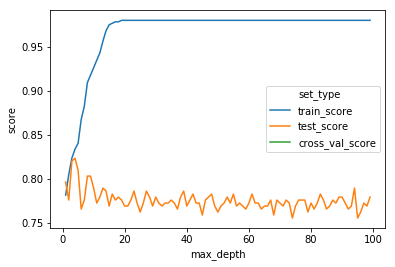

In [99]:
sns.lineplot(x= 'max_depth', y = 'score', hue = 'set_type', data = scores_data_long);

In [73]:
from sklearn.model_selection import cross_val_score

In [74]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [78]:
cross_val_score(clf,X_train,y_train, cv = 5).mean()

0.7835799743626264

In [102]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,NaN
199,2,cross_val_score,NaN
200,3,cross_val_score,NaN
201,4,cross_val_score,NaN
202,5,cross_val_score,NaN
203,6,cross_val_score,NaN
204,7,cross_val_score,NaN
205,8,cross_val_score,NaN
206,9,cross_val_score,NaN
207,10,cross_val_score,NaN


In [112]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [113]:
cross_val_score(best_clf, X_test,y_test, cv = 5).mean()

0.7898305084745763

In [116]:
clf = tree.DecisionTreeClassifier()

In [115]:
from sklearn.model_selection import GridSearchCV

In [118]:
parametrs = {'criterion':['gini','entropy'] ,'max_depth':range(1,30)}

In [119]:
grid_search_cv_clf = GridSearchCV(clf,parametrs, cv=5)

In [121]:
grid_search_cv_clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [122]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 9}

In [123]:
best_clf = grid_search_cv_clf.best_estimator_

In [125]:
best_clf.score(X_test,y_test)

0.8033898305084746

In [126]:
from sklearn.metrics import precision_score

In [129]:
from sklearn.metrics import recall_score

In [127]:
y_pred = best_clf.predict(X_test)

In [128]:
precision_score(y_test,y_pred)

0.8369565217391305

In [130]:
recall_score(y_test,y_pred)

0.6416666666666667

In [133]:
y_predicted_prob = best_clf.predict_proba(X_test)

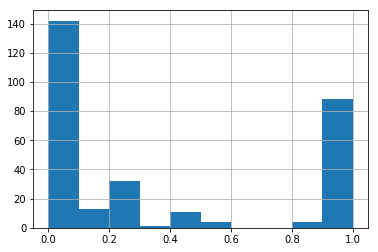

In [137]:
pd.Series(y_predicted_prob[:,1]).hist();

In [147]:
y_pred = np.where(y_predicted_prob[:,1] > 0.8, 1 , 0)

In [148]:
precision_score(y_test,y_pred)

0.8369565217391305

In [149]:
recall_score(y_test,y_pred)

0.6416666666666667

In [156]:
pd.Series(y_predicted_prob[:,1]).unique()

array([0.25      , 0.5       , 0.09433962, 1.        , 0.        ,
       0.81818182, 0.17241379, 0.41176471, 0.29166667, 0.33333333])

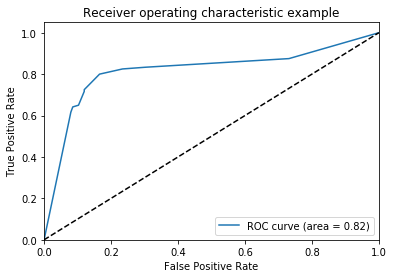

In [155]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right");


In [ ]:
clf=tree.Des